In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/labels_tallahassee_map_2022.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Bragg Memorial Stadium,3865,1036,569,522,op2009_48837_32.jpg,5000,5000,4434,1558
1,Famu Teaching Gym Alfred Lawson Jr Multipurpos...,4333,1718,423,487,op2009_48837_32.jpg,5000,5000,4756,2205
2,Gaither Gymnasium Complex,4937,1616,63,136,op2009_48837_32.jpg,5000,5000,5000,1752
3,FAMU Softball Complex,4840,2541,130,115,op2009_48837_32.jpg,5000,5000,4970,2656
4,Bryant's Neighborhood Marketplace,4119,2940,84,87,op2009_48837_32.jpg,5000,5000,4203,3027


In [ ]:
df[[0,1,2,3,4]]

,0,1,2,3,4
0,Bragg Memorial Stadium,3865,1036,569,522
1,Famu Teaching Gym Alfred Lawson Jr Multipurpos...,4333,1718,423,487
2,Gaither Gymnasium Complex,4937,1616,63,136
3,FAMU Softball Complex,4840,2541,130,115
4,Bryant's Neighborhood Marketplace,4119,2940,84,87
...,...,...,...,...,...
81,Providence Pointe,91,999,172,124
82,Big A's Tires South (Tire Shop),658,3211,54,121
83,Pure Snack and Deli,860,3402,66,60
84,Blades Barbershop TLH LLC,589,3420,157,60


In [ ]:
df["bottom_right_point_X"]= df[1] + df[3]

df

,0,1,2,3,4,5,6,7,8,9,bottom_right_point_X
0,Bragg Memorial Stadium,3865,1036,569,522,op2009_48837_32.jpg,5000,5000,4434,1558,4434
1,Famu Teaching Gym Alfred Lawson Jr Multipurpos...,4333,1718,423,487,op2009_48837_32.jpg,5000,5000,4756,2205,4756
2,Gaither Gymnasium Complex,4937,1616,63,136,op2009_48837_32.jpg,5000,5000,5000,1752,5000
3,FAMU Softball Complex,4840,2541,130,115,op2009_48837_32.jpg,5000,5000,4970,2656,4970
4,Bryant's Neighborhood Marketplace,4119,2940,84,87,op2009_48837_32.jpg,5000,5000,4203,3027,4203
...,...,...,...,...,...,...,...,...,...,...,...
81,Providence Pointe,91,999,172,124,op2009_48837_32.jpg,5000,5000,263,1123,263
82,Big A's Tires South (Tire Shop),658,3211,54,121,op2009_48837_32.jpg,5000,5000,712,3332,712
83,Pure Snack and Deli,860,3402,66,60,op2009_48837_32.jpg,5000,5000,926,3462,926
84,Blades Barbershop TLH LLC,589,3420,157,60,op2009_48837_32.jpg,5000,5000,746,3480,746


In [ ]:
df["bottom_right_point_Y"]= df[2] + df[4]

df

,0,1,2,3,4,5,6,7,8,9,bottom_right_point_X,bottom_right_point_Y
0,Bragg Memorial Stadium,3865,1036,569,522,op2009_48837_32.jpg,5000,5000,4434,1558,4434,1558
1,Famu Teaching Gym Alfred Lawson Jr Multipurpos...,4333,1718,423,487,op2009_48837_32.jpg,5000,5000,4756,2205,4756,2205
2,Gaither Gymnasium Complex,4937,1616,63,136,op2009_48837_32.jpg,5000,5000,5000,1752,5000,1752
3,FAMU Softball Complex,4840,2541,130,115,op2009_48837_32.jpg,5000,5000,4970,2656,4970,2656
4,Bryant's Neighborhood Marketplace,4119,2940,84,87,op2009_48837_32.jpg,5000,5000,4203,3027,4203,3027
...,...,...,...,...,...,...,...,...,...,...,...,...
81,Providence Pointe,91,999,172,124,op2009_48837_32.jpg,5000,5000,263,1123,263,1123
82,Big A's Tires South (Tire Shop),658,3211,54,121,op2009_48837_32.jpg,5000,5000,712,3332,712,3332
83,Pure Snack and Deli,860,3402,66,60,op2009_48837_32.jpg,5000,5000,926,3462,926,3462
84,Blades Barbershop TLH LLC,589,3420,157,60,op2009_48837_32.jpg,5000,5000,746,3480,746,3480


In [ ]:
df_new = df[[0, 1,2,"bottom_right_point_X","bottom_right_point_Y"]]
df_new

,0,1,2,bottom_right_point_X,bottom_right_point_Y
0,Bragg Memorial Stadium,3865,1036,4434,1558
1,Famu Teaching Gym Alfred Lawson Jr Multipurpos...,4333,1718,4756,2205
2,Gaither Gymnasium Complex,4937,1616,5000,1752
3,FAMU Softball Complex,4840,2541,4970,2656
4,Bryant's Neighborhood Marketplace,4119,2940,4203,3027
...,...,...,...,...,...
81,Providence Pointe,91,999,263,1123
82,Big A's Tires South (Tire Shop),658,3211,712,3332
83,Pure Snack and Deli,860,3402,926,3462
84,Blades Barbershop TLH LLC,589,3420,746,3480


In [ ]:
df_new["pt1"] = df_new[1].map(str) + ','+ df_new[2].map(str)
df_new["pt2"] = df_new["bottom_right_point_X"].map(str) + ','+ df_new["bottom_right_point_Y"].map(str)
df_new.rename(columns={0: 'Landmarks'}, inplace=True)
df_new = df_new[['Landmarks',"pt1", "pt2"]]
df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,Landmarks,pt1,pt2
0,Bragg Memorial Stadium,"3865,1036","4434,1558"
1,Famu Teaching Gym Alfred Lawson Jr Multipurpos...,"4333,1718","4756,2205"
2,Gaither Gymnasium Complex,"4937,1616","5000,1752"
3,FAMU Softball Complex,"4840,2541","4970,2656"
4,Bryant's Neighborhood Marketplace,"4119,2940","4203,3027"
...,...,...,...
81,Providence Pointe,"91,999","263,1123"
82,Big A's Tires South (Tire Shop),"658,3211","712,3332"
83,Pure Snack and Deli,"860,3402","926,3462"
84,Blades Barbershop TLH LLC,"589,3420","746,3480"


In [ ]:
#/content/drive/MyDrive
df_new.to_excel ('/content/drive/MyDrive/48837_32.xlsx', index = False, header=True)

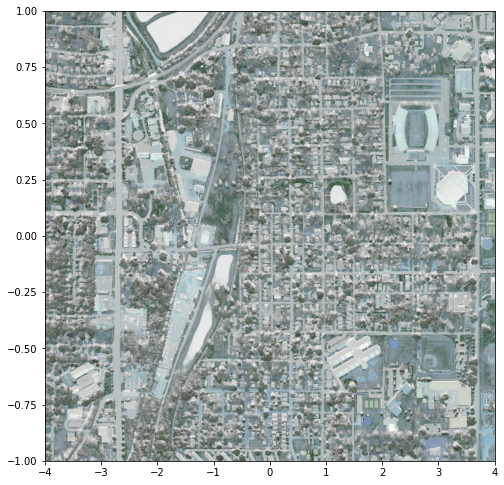

In [ ]:
image = cv2.imread('/content/drive/MyDrive/op2009_48837_32 .jpg')
#plt.figure(figsize = (10,2)
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["figure.autolayout"] = True
plt.imshow(image,extent=[-4, 4, -1, 1], aspect=4)
plt.show()

In [ ]:
image.shape

(5000, 5000, 3)

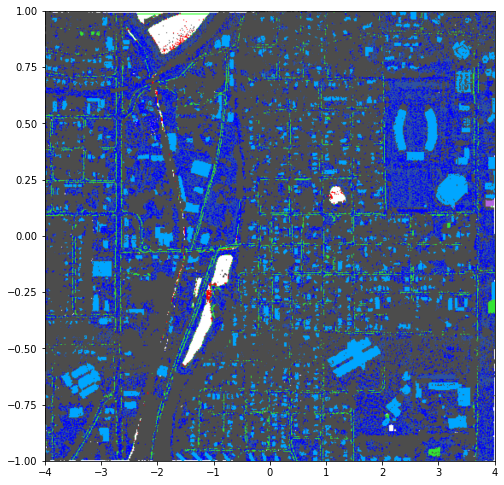

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Lidar_48837.png')
dim = (image.shape[0],image.shape[1])
resized = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA)
#plt.figure(figsize = (20,2)
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["figure.autolayout"] = True
plt.imshow(resized,extent=[-4, 4, -1, 1], aspect=4)

plt.show()

In [ ]:
resized.shape

(5000, 5000, 3)

In [ ]:
start_points = []
end_points = []
for index,row in df_new.iterrows():
  start_points.append(tuple(map(int, row["pt1"].split(','))))
  end_points.append(tuple(map(int, row["pt2"].split(','))))
print(start_points)
print(end_points)


[(3865, 1036), (4333, 1718), (4937, 1616), (4840, 2541), (4119, 2940), (4193, 3621), (3106, 3588), (3984, 4002), (3793, 4303), (3759, 4541), (199, 3875), (845, 4232), (590, 4633), (623, 4727), (718, 4612), (850, 3770), (890, 3311), (753, 3330), (547, 2789), (649, 2130), (679, 2051), (861, 1969), (585, 1343), (608, 209), (656, 534), (853, 312), (628, 28), (868, 4020), (1379, 3481), (4574, 672), (4602, 1022), (4758, 1006), (4656, 1188), (4635, 1292), (4663, 1517), (4574, 1629), (4901, 960), (4995, 1778), (4901, 1908), (4896, 2015), (4025, 1560), (4495, 1560), (3113, 1721), (3305, 1560), (3302, 1497), (3088, 1877), (3680, 1762), (3688, 2161), (4214, 2140), (4633, 2449), (4485, 3141), (4957, 2998), (4201, 3826), (3946, 4135), (4132, 4193), (4193, 4311), (4265, 4122), (4607, 4186), (4367, 4245), (4423, 4380), (4423, 4462), (4490, 4495), (3895, 3982), (4852, 3611), (4840, 4206), (3601, 4939), (2419, 3241), (2089, 3575), (1762, 4891), (2906, 4924), (927, 644), (856, 375), (1560, 2120), (1596,

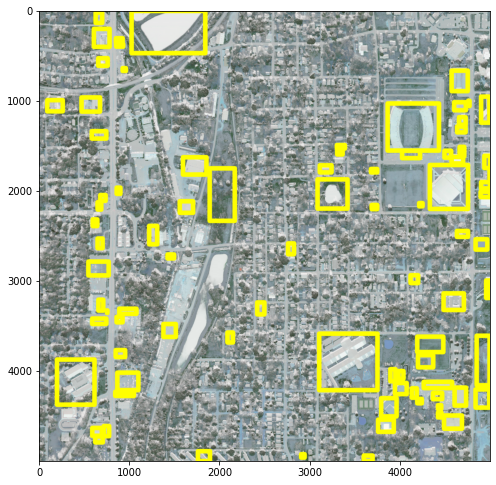

In [ ]:
image = cv2.imread('/content/drive/MyDrive/op2009_48837_32 .jpg')
color = (255,255,0)
thickness =50
for start_point, end_point in zip(start_points, end_points):
  image = cv2.rectangle(image, start_point, end_point, color, thickness )
plt.imshow(image)


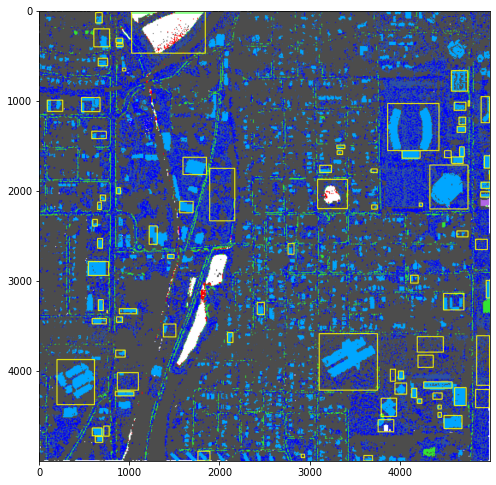

In [ ]:
#image1 = image
image1 = cv2.imread('/content/drive/MyDrive/Lidar_48837.png')
color = (255,255,0)
thickness =10
for start_point, end_point in zip(start_points, end_points):
  image1 = cv2.rectangle(resized, start_point, end_point, color, thickness )
plt.imshow(image1)

In [ ]:
!pip install lasio


In [ ]:
import lasio
#import pylas
!pip install pylas
!pip install lasio[all]



  Created wheel for pylas: filename=pylas-0.4.3-py3-none-any.whl size=40353 sha256=eba3a364b627d7bfc3f79a73f18bb92f8a08265e50e0fdfc9a18a049ecc31fbf
  Stored in directory: /root/.cache/pip/wheels/b2/af/a6/c8c7ce1b3dc27174d5524f6c9cca5df59974caca07534d4408
Successfully built pylas


In [ ]:
import pylas

In [ ]:
las = laspy.read('/content/drive/MyDrive/48837.las')
las

<LasData(1.2, point fmt: <PointFormat(1, 0 bytes of extra dims)>, 3951015 points, 259 vlrs)>

In [ ]:
!pip install liblas

In [ ]:
!pip install laspy

In [ ]:
import laspy
import laspy.file

In [ ]:
import numpy as np
import laspy

with laspy.open('/content/drive/MyDrive/48837.las') as fh:
    print('Points from Header:', fh.header.point_count)
    las = fh.read()
    #fh.df()
    #fh.min
    #fh.shape
    #fh.curves()
    #size = fh.shape()
    print(las)
    print('Points from data:', len(las.points))
    ground_pts = las.classification == 2
    bins, counts = np.unique(las.return_number[ground_pts], return_counts=True)
    print('Ground Point Return Number distribution:')
    for r,c in zip(bins,counts):
        print('    {}:{}'.format(r,c))

Points from Header: 3951015
<LasData(1.2, point fmt: <PointFormat(1, 0 bytes of extra dims)>, 3951015 points, 259 vlrs)>
Points from data: 3951015
Ground Point Return Number distribution:
    1:909375
    2:125371
    3:27293
    4:1504
